### What are weak learners in ML?
- Weak learners are models that perform slightly better than random guessing. Strong learners are models that have arbitrarily good accuracy. Weak and strong learners are tools from computational learning theory and provide the basis for the development of the boosting class of ensemble method.

### Decision stump
- A decision stump is a machine learning model consisting of a one-level decision tree. That is, it is a decision tree with one internal node (the root) which is immediately connected to the terminal nodes (its leaves). A decision stump makes a prediction based on the value of just a single input feature.

<img src="https://python-course.eu/images/machine-learning/Boosting_Decision_Stumps_500w.webp">

### AdaBoost 
-  Adaptive Boosting, is a statistical classification meta-algorithm formulated by Yoav Freund and Robert Schapire in 1995, who won the 2003 Gödel Prize for their work. It can be used in conjunction with many other types of learning algorithms to improve performance.

<img src="https://miro.medium.com/max/640/1*PsHLHIDJAVtbMBV3DyUi1Q.webp">

<img src="https://miro.medium.com/max/1400/1*8VLJWDtYRehTEZXTLhEQog.png">

<img src="https://www.researchgate.net/profile/Zhuo-Wang-36/publication/288699540/figure/fig9/AS:668373486686246@1536364065786/Illustration-of-AdaBoost-algorithm-for-creating-a-strong-classifier-based-on-multiple.png">

In [1]:
import pandas as pd
import numpy as np
from mlxtend.plotting import plot_decision_regions

In [2]:
df = pd.DataFrame()

In [3]:
df['X1'] = [1,2,3,4,5,6,6,7,9,9]
df['X2'] = [5,3,6,8,1,9,5,8,9,2]
df['label'] = [1,1,0,1,0,1,0,1,0,0]

<AxesSubplot: xlabel='X1', ylabel='X2'>

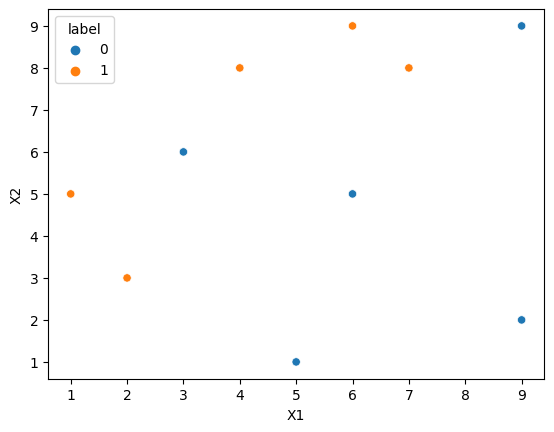

In [4]:
import seaborn as sns
sns.scatterplot(x=df['X1'],y=df['X2'],hue=df['label'])

In [5]:
df['weights'] = 1/df.shape[0]

In [6]:
from sklearn.tree import DecisionTreeClassifier

In [8]:
dt1 = DecisionTreeClassifier(max_depth=1)

In [9]:
X = df.iloc[:,0:2].values
y = df.iloc[:,2].values

In [10]:
# Step 2 - Train 1st model
dt1.fit(X,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'X[1] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.75, 0.25, 'gini = 0.469\nsamples = 8\nvalue = [3, 5]')]

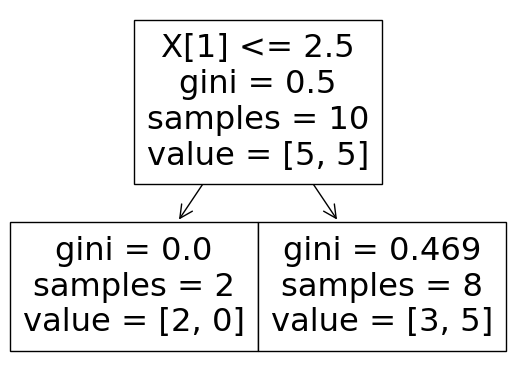

In [11]:
from sklearn.tree import plot_tree
plot_tree(dt1)

<AxesSubplot: >

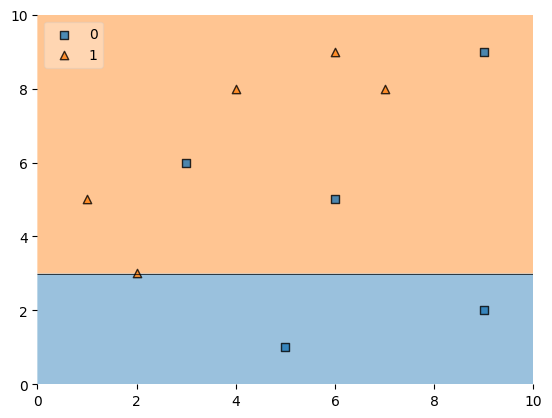

In [12]:
plot_decision_regions(X, y, clf=dt1, legend=2)

In [13]:
df['y_pred'] = dt1.predict(X)

In [14]:
def calculate_model_weight(error):

  return 0.5*np.log((1-error)/(error))

In [15]:
# Step 3 - calculate model weight
alpha1 = calculate_model_weight(0.3)
alpha1

0.42364893019360184

In [16]:
# Step 4 - Update weights
def update_row_weights(row,alpha=0.423):
  if row['label'] == row['y_pred']:
    return row['weights'] * np.exp(-alpha)
  else:
    return row['weights'] * np.exp(alpha)

In [17]:
df['updated_weights'] = df.apply(update_row_weights,axis=1)

In [18]:
df['updated_weights'].sum()

0.9165153319682015

In [19]:
df['nomalized_weights'] = df['updated_weights']/df['updated_weights'].sum() 

In [20]:
df['nomalized_weights'].sum()

1.0

In [21]:

df['cumsum_upper'] = np.cumsum(df['nomalized_weights'])

In [22]:
df['cumsum_lower'] = df['cumsum_upper'] - df['nomalized_weights']

In [24]:
df[['X1','X2','label','weights','y_pred','updated_weights','cumsum_lower','cumsum_upper']]

,X1,X2,label,weights,y_pred,updated_weights,cumsum_lower,cumsum_upper
0,1,5,1,0.1,1,0.065508,0.000000,0.071475
1,2,3,1,0.1,1,0.065508,0.071475,0.142950
2,3,6,0,0.1,1,0.152653,0.142950,0.309508
3,4,8,1,0.1,1,0.065508,0.309508,0.380983
4,5,1,0,0.1,0,0.065508,0.380983,0.452458
5,6,9,1,0.1,1,0.065508,0.452458,0.523933
6,6,5,0,0.1,1,0.152653,0.523933,0.690492
7,7,8,1,0.1,1,0.065508,0.690492,0.761967
8,9,9,0,0.1,1,0.152653,0.761967,0.928525
9,9,2,0,0.1,0,0.065508,0.928525,1.000000


In [25]:

def create_new_dataset(df):

  indices = []

  for i in range(df.shape[0]):
    a = np.random.random()
    for index,row in df.iterrows():
      if row['cumsum_upper'] > a and a > row['cumsum_lower']:
        indices.append(index)
  return indices
     

In [26]:

index_values = create_new_dataset(df)

index_values
     

[6, 8, 0, 6, 3, 1, 8, 6, 9, 2]

In [27]:
second_df = df.iloc[index_values,[0,1,2,3]]

In [28]:
second_df

,X1,X2,label,weights
6,6,5,0,0.1
8,9,9,0,0.1
0,1,5,1,0.1
6,6,5,0,0.1
3,4,8,1,0.1
1,2,3,1,0.1
8,9,9,0,0.1
6,6,5,0,0.1
9,9,2,0,0.1
2,3,6,0,0.1


In [29]:
dt2 = DecisionTreeClassifier(max_depth=1)

In [30]:
X = second_df.iloc[:,0:2].values
y = second_df.iloc[:,2].values

In [31]:
dt2.fit(X,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'X[0] <= 5.0\ngini = 0.42\nsamples = 10\nvalue = [7, 3]'),
 Text(0.25, 0.25, 'gini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]')]

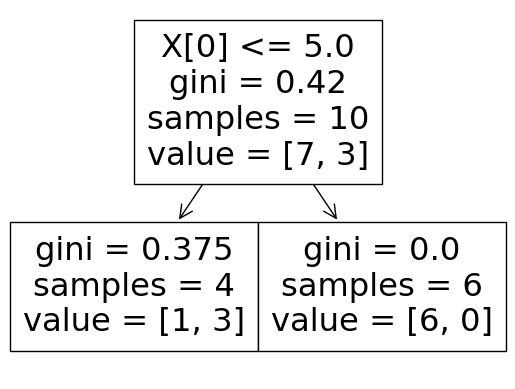

In [32]:
plot_tree(dt2)

<AxesSubplot: >

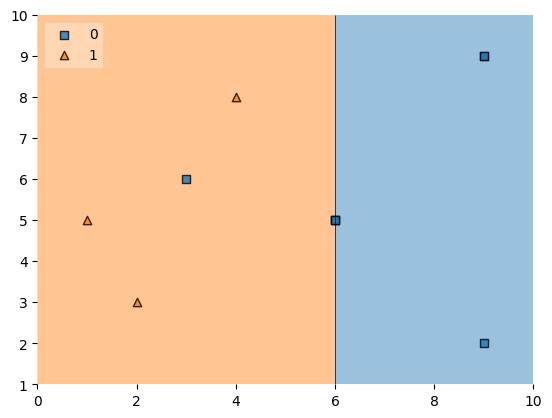

In [33]:
plot_decision_regions(X, y, clf=dt2, legend=2)

In [34]:
second_df['y_pred'] = dt2.predict(X)

In [35]:
second_df

,X1,X2,label,weights,y_pred
6,6,5,0,0.1,0
8,9,9,0,0.1,0
0,1,5,1,0.1,1
6,6,5,0,0.1,0
3,4,8,1,0.1,1
1,2,3,1,0.1,1
8,9,9,0,0.1,0
6,6,5,0,0.1,0
9,9,2,0,0.1,0
2,3,6,0,0.1,1


In [36]:
alpha2 = calculate_model_weight(0.1)

In [37]:
alpha2

1.0986122886681098

In [38]:
# Step 4 - Update weights
def update_row_weights(row,alpha=1.09):
  if row['label'] == row['y_pred']:
    return row['weights'] * np.exp(-alpha)
  else:
    return row['weights'] * np.exp(alpha)

In [39]:
second_df['updated_weights'] = second_df.apply(update_row_weights,axis=1)

In [40]:

second_df['nomalized_weights'] = second_df['updated_weights']/second_df['updated_weights'].sum()

In [41]:
second_df['nomalized_weights'].sum()

1.0

In [42]:
second_df['cumsum_upper'] = np.cumsum(second_df['nomalized_weights'])
     

In [43]:
second_df['cumsum_lower'] = second_df['cumsum_upper'] - second_df['nomalized_weights']

In [44]:
second_df[['X1','X2','label','weights','y_pred','nomalized_weights','cumsum_lower','cumsum_upper']]

,X1,X2,label,weights,y_pred,nomalized_weights,cumsum_lower,cumsum_upper
6,6,5,0,0.1,0,0.056034,0.000000,0.056034
8,9,9,0,0.1,0,0.056034,0.056034,0.112068
0,1,5,1,0.1,1,0.056034,0.112068,0.168102
6,6,5,0,0.1,0,0.056034,0.168102,0.224136
3,4,8,1,0.1,1,0.056034,0.224136,0.280170
1,2,3,1,0.1,1,0.056034,0.280170,0.336204
8,9,9,0,0.1,0,0.056034,0.336204,0.392238
6,6,5,0,0.1,0,0.056034,0.392238,0.448272
9,9,2,0,0.1,0,0.056034,0.448272,0.504306
2,3,6,0,0.1,1,0.495694,0.504306,1.000000


In [45]:
index_values = create_new_dataset(second_df)

In [46]:
third_df = second_df.iloc[index_values,[0,1,2,3]]
     

In [48]:
dt3 = DecisionTreeClassifier(max_depth=1)

X = second_df.iloc[:,0:2].values
y = second_df.iloc[:,2].values

dt3.fit(X,y)

DecisionTreeClassifier(max_depth=1)

<AxesSubplot: >

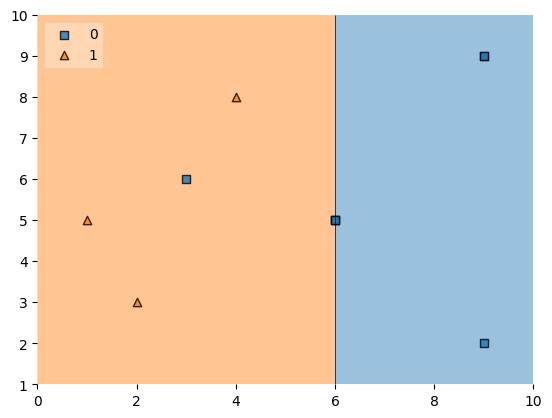

In [49]:
plot_decision_regions(X, y, clf=dt3, legend=2)

In [50]:
third_df['y_pred'] = dt3.predict(X)

In [51]:
third_df

,X1,X2,label,weights,y_pred
0,1,5,1,0.1,0
8,9,9,0,0.1,0
8,9,9,0,0.1,1
6,6,5,0,0.1,0
0,1,5,1,0.1,1
0,1,5,1,0.1,1
0,1,5,1,0.1,0
9,9,2,0,0.1,0
8,9,9,0,0.1,0
0,1,5,1,0.1,1


In [52]:
alpha3 = calculate_model_weight(0.7)
alpha3
     

-0.4236489301936017

In [53]:

print(alpha1,alpha2,alpha3)

0.42364893019360184 1.0986122886681098 -0.4236489301936017


In [54]:

query = np.array([1,5]).reshape(1,2)
dt1.predict(query)
     

array([1], dtype=int64)

In [55]:
dt2.predict(query)

array([1], dtype=int64)

In [56]:
dt3.predict(query)

array([1], dtype=int64)

In [57]:

alpha1*1 + alpha2*(1) + alpha3*(1)

1.09861228866811

In [58]:
np.sign(1.09)

1.0

In [59]:
query = np.array([9,9]).reshape(1,2)
dt1.predict(query)
     

array([1], dtype=int64)

In [60]:

dt2.predict(query)

array([0], dtype=int64)

In [61]:
dt3.predict(query)

array([0], dtype=int64)

In [62]:
alpha1*(1) + alpha2*(-1) + alpha3*(-1)

-0.2513144282809062

In [63]:

np.sign(-0.25)

-1.0